ANSWERS
Best R2 Value: 0.897

sales = 2.9211 + 0.0458*tv + 9.2*radio

Predicted Sales at TV=199, Radio=32, Newspaper=88
sales = 2.9211 + 0.0458*199 + 9.2*32
sales = $306.44


### Task
- Download: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
- Find the best R2 value, by searching the feature space
- Include your code
- Include your final R2 value, also the equation for y_hat
  - Such as sales = 3.5 + 7.7*tv + 9.2*newspaper, etc
- Predict the sales for TV=199, Radio=32, Newspaper=88

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.max_colwidth = 100

from IPython.core.display import HTML

#def short_summary(est):
#    return HTML(est.summary().tables[i].as_html())

def dummify(df,column):
    dummy = pd.get_dummies(df[column]).rename(columns = lambda x: column+'_'+str(x)).iloc[:,0:len(df[column].unique())-1]
    df = df.drop(column, axis =1)
    return pd.concat([df,dummy],axis=1)
from itertools import combinations

In [2]:
df = pd.read_csv('Advertising.csv',index_col = 0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


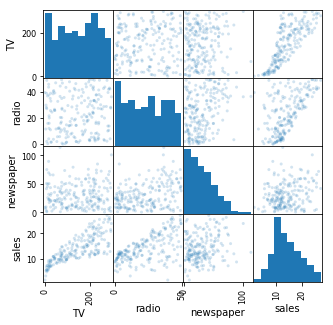

In [4]:
scatter_matrix(df, alpha= 0.2, figsize =(5,5))
None

In [6]:
y = df.sales
X = df[['TV', 'radio']].astype(float)
X['Const']= 1
model = sm.OLS(endog=y, exog= X).fit() #exogenous and endogenous (what we predict) variables
X.head()

,TV,radio,Const
1,230.1,37.8,1
2,44.5,39.3,1
3,17.2,45.9,1
4,151.5,41.3,1
5,180.8,10.8,1


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           4.83e-98
Time:                        08:24:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
Const          2.9211      0.294      9.919      0.000       2.340       3.502
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
rows = []

for i in range(1,11):

    combos = list(combinations(['TV', 'radio', 'newspaper', 'Const'],i))

    #combos = [[*c] for c in combos]

    for com in combos:

        y = df.sales

        X = pd.DataFrame(df, columns=com)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        model = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)

        score = model.score(X_test, y_test)
        
        s = ', '.join(com)        
        rows.append({'Score':score, 'Columns':s, 'Coef':model.coef_,'Int':model.intercept_})        
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1.head()

        #print('score:', score, 'columns:', com)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
df1.loc[rows['Score'].idxmax()]

TypeError: list indices must be integers or slices, not str

,Coef,Columns,Int,Score
0,[0.0482245128152],TV,7.066583,0.623689
1,[0.223774515044],radio,9.290417,0.081757
2,[0.0658344742479],newspaper,12.602571,-0.111407
3,"[0.0447396196487, 0.199355464099]","TV, radio",2.867355,0.859348
4,"[0.0472036046549, 0.0507723040181]","TV, newspaper",5.673310,0.643582
5,"[0.216625857637, 0.0156987409941]","radio, newspaper",8.980343,0.071047
6,"[0.0446651206327, 0.196630062826, 0.00607438654789]","TV, radio, newspaper",2.758072,0.855557
